In [2]:
import os
import json

In [3]:
src = '/home/ludan/code/github/FSGAN/FSGAN/demo'
src_photo = os.path.join(src, 'photo')
photo_file = os.listdir(src_photo)[0].replace('.jpg', '').replace('.png', '')
tmp_json = [{
    "image_name": photo_file,
    "skin_color": [156, 137],
    "lip_color": [197.16918429003022, 125.14803625377644, 109.26283987915407],
    "eye_color": [147.39772727272728, 122.875, 109.64772727272727],
    "hair": 0, "hair_color": 1, "gender": 0, "earring": 1, "smile": 0, "frontal_face": 0,
    "style": 2
}]
# Only image_name and style matter here.
with open(os.path.join(src, 'tmp.json'), 'w') as f:
  f.write(json.dumps(tmp_json))

In [4]:
# Modify the json path from FS2K to customed path
with open('data/aligned_dataset.py', 'r') as f:
    file_content = f.read().replace('/home/ludan/code/github/FSGAN/FSGAN/dataset/FS2K_preproc/train/anno_train.json','demo/tmp.json').replace('/home/ludan/code/github/FSGAN/FSGAN/dataset/FS2K_preproc/test/anno_test.json','demo/tmp.json')
with open('data/aligned_dataset.py', 'w') as f:
    f.write(file_content)

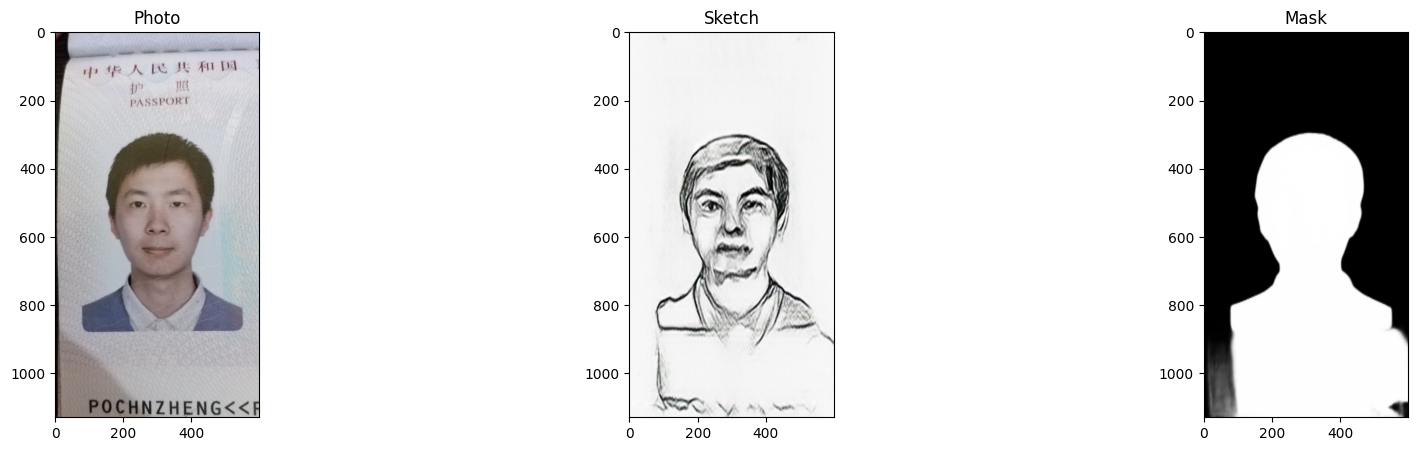

In [5]:
import cv2
import matplotlib.pyplot as plt

#real image
image = cv2.imread(os.path.join(src_photo, os.listdir(src_photo)[0]))
sketch_path = os.path.join(src_photo, os.listdir(src_photo)[0]).replace('/photo/', '/results/').replace('.jpg', '_fake_B.jpg')
if os.path.exists(sketch_path):
  sketch = cv2.imread(sketch_path)
else:
   sketch_path = sketch_path.replace('_fake_B.jpg', '_fake_B.png')
   sketch = cv2.imread(sketch_path)
sketch = cv2.resize(sketch, image.shape[:2][::-1], cv2.INTER_LINEAR)
fg, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(21, 5))
ax0.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax0.set_title('Photo')
ax1.imshow(cv2.cvtColor(sketch, cv2.COLOR_BGR2RGB))
ax1.set_title('Sketch')
ax2.imshow(cv2.cvtColor(cv2.imread(sketch_path.replace('/results/', '/mask/').replace('_fake_B', '')), cv2.COLOR_BGR2RGB))
ax2.set_title('Mask')
plt.show()



In [3]:

# 读取photo文件夹下的图片名称
photo_path = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256"
src_photo = os.path.join(photo_path, 'photo')
photo_list = os.listdir(src_photo)
#排序
photo_list.sort(key=lambda x:int(x[:-4]))
tmp_json = []
for i in range(len(photo_list)):
    photo_file = photo_list[i].replace('.jpg', '').replace('.png', '')
    tmp_dict = {
    "image_name": photo_file,
    "skin_color": [156, 137],
    "lip_color": [197.16918429003022, 125.14803625377644, 109.26283987915407],
    "eye_color": [147.39772727272728, 122.875, 109.64772727272727],
    "hair": 0, "hair_color": 1, "gender": 0, "earring": 1, "smile": 0, "frontal_face": 0,
    "style": 0
    }
    tmp_json.append(tmp_dict)
# Only image_name and style matter here.
with open(os.path.join(photo_path, 'celeba.json'), 'w') as f:
  f.write(json.dumps(tmp_json))

In [ ]:
# Modify the json path from FS2K to customed path
with open('data/aligned_dataset.py', 'r') as f:
    file_content = f.read().replace('demo/tmp.json','/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba/celeba.json').replace('/home/ludan/code/github/FSGAN/FSGAN/dataset/FS2K_preproc/test/anno_test.json','/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba/celeba.json')
with open('data/aligned_dataset.py', 'w') as f:
    f.write(file_content)

In [14]:
import cv2
import os
import json
from PIL import Image
import numpy as np
# 将照片和mask加工为背景为纯白的图片
photo_path = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/results1"
mask_path = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/mask"
photo_nobg_path = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/sketch1_nobg"

photo_list = os.listdir(photo_path)
#photo_list.sort(key=lambda x:int(x[:-11]))
for i in range(len(photo_list)):
#for i in range(1):

    photo_file = os.path.join(photo_path, photo_list[i])
    mask_file = os.path.join(mask_path, photo_list[i].replace('.jpg', '.png')).replace('_fake_B', '')
    output_path = os.path.join(photo_nobg_path, photo_list[i].replace('_fake_B', '').replace('.png', '.jpg'))

    pil_img0 = np.asarray(Image.open(photo_file).resize((256, 256), Image.LANCZOS))
    pil_img = pil_img0.copy()
    pil_img.setflags(write=1)

    mask_array = np.zeros((256, 256))
    mask_img = np.asarray(Image.open(mask_file).convert('L').resize((256,256)))
    mask_array += mask_img

    mask_bool = mask_array > 1
    hoge = np.ones((256, 256))
    bg = mask_bool * hoge
    # print(mask)
    for y, yy in enumerate(bg):
        for x, xx in enumerate(yy):
            if xx== 0:
                pil_img[y][x] = np.full(3, 255)
    # clear_array = pil_img * bg
    # print(np.max(pil_img))
    clear_img = Image.fromarray(pil_img.astype(np.uint8))
    clear_img.save(output_path)


    

    

UnidentifiedImageError: cannot identify image file '/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/results1/index.html'

In [6]:
import os
dest_path = "/home/ludan/dataset/celeba_hq_256_sketch/results3"
source_path1 = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/results0"
source_path2 = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/results1"
source_path3 = "/home/ludan/code/github/FSGAN/FSGAN/dataset/celeba_hq_256/results2"

# 将source_path1, source_path2, source_path3中的图片按顺序合并到dest_path中，名称是原名称+results0, results1, results2
photo_list = os.listdir(source_path3)
for i, photo_name in enumerate(photo_list):
    #photo_name只取下划线前面的部分
    photo_name_tmp = photo_name.split('_')[0] + 'style2.png'
    # 将图片重命名为photo_name_tmp并复制到dest_path中
    os.system('cp ' + os.path.join(source_path1, photo_name) + ' ' + os.path.join(dest_path, photo_name_tmp))
